In [142]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
class LWFA():
    
    def __init__(self,z0,omega=2):
        
        D = {}
        D['e'] = 1
        D['m'] = 1
        D['omega'] = omega
        D['omega_0'] = 1
        D['k'] = 1
        D['z0'] = z0
        D['x'] = 0
        self.D = D

    def x(self,E,t,z):
        
        D = self.D
        
        w = D['omega']
        w0 = D['omega_0']
        
        x = D['e']/(D['m']*(w**2-w0**2)) * E
        
        return x

From source [sp mangels] we find that the wave packets they used had a width of 35 fs. Knowing this we construct a wave packet with width of sigma_z = c*tou ( tou = 35 fs)

to encapsulate the entire region we extend the width of the entire region to 6 sigma to hold ~ 99.7% attentuation

In [148]:
class region():
    def __init__(self,name,N = 50):
        self.name = name
        self.width = 6 * 3*10**8 * 35*10**(-15)
        self.N = N
        self.dz = self.width / self.N
        self.c = 3*10**8
        
        # establish a list of electrons, append N electrons and update their positions
        self.electrons = []
        [self.electrons.append(LWFA(-self.width/2 + self.dz * i)) for i in np.arange(self.N)]
        [self.electrons[i].x(0,0,self.dz * i) for i in np.arange(self.N)] #calculate electron positions
        self.positions = -self.width/2.0 + self.dz * np.arange(self.N)  #create a vector holding the positions of all the electrons
        self.amplitudes = np.zeros(self.N)   #creates an amplitude storage vector
        
        #establish the 'amplitude' of positive ions (they're in the same orginal places as the electons)
        self.proton_amp = np.zeros(self.N)
        
    def wave(self,w,z,t):
        sigma = self.c * 35*10**(-15)
        exponent = z**2 / (2 * sigma**2)
        E = np.exp(-exponent)*np.cos(w*(z - t))
        return E
    
    def update_x(self):
        for i in np.arange(self.N):
            z = self.positions[i]
            t = 0
            w = np.linspace(-np.pi/2,np.pi/2,3)
            E = 0
            for j in w:
                E += self.wave(j,z,t)
            self.amplitudes[i] =(-1)**i * self.electrons[i].x(E,t,z)
            


In [149]:
region1 = region('region1')
region1.update_x()

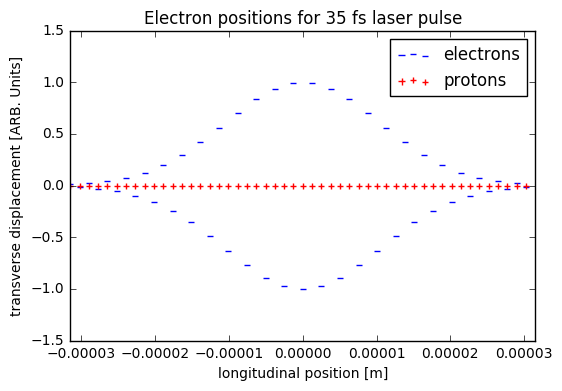

In [150]:
fig = plt.figure()
hold = True
plt.xlim([-region1.width/2,region1.width/2])
plt.scatter(region1.positions, region1.amplitudes, color='b', marker='_', label = 'electrons')
plt.scatter(region1.positions, region1.proton_amp, color='r', marker='+', label = 'protons')
plt.legend()
plt.title('Electron positions for 35 fs laser pulse')
plt.ylabel('transverse displacement [ARB. Units]')
plt.xlabel('longitudinal position [m]')
plt.show()

The plot above represents the distribution of electrons for a gaussian wave packet that has been fully immersed in the plasma. This snapshot in time displaces the amplitude of displacement for electrons placed along the z-axis at x = 0